# **4장 데이터 전처리 (Data Preprocessing)**

## <font color='blue'>**4.1 결측치 처리**

In [ ]:
# 구글 코랩(colab) 한글 깨짐 현상 해결방법
# https://teddylee777.github.io/colab/colab-korean/
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_pickle('MCR2019_gzip.pkl', compression='gzip')

In [3]:
df.head()

,성별,연령(1세),지역(권역),직업,가구 월평균 소득(1),최종학력,주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),...,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.1,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.2,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.3,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.4,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.5,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.6,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.7,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.8,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.9,PPL(간접광고) 평가 - 제품/브랜드 구매의향
0,1,14,1,6,6,8,3,2,99,0.0,...,9.0,10.0,13,NaN,NaN,NaN,NaN,NaN,NaN,4
1,1,14,1,6,6,8,1,2,99,30.0,...,6.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,14,1,6,6,8,2,2,99,90.0,...,4.0,12.0,14,NaN,NaN,NaN,NaN,NaN,NaN,5
3,1,14,1,6,8,8,1,2,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1,14,1,6,9,8,1,2,99,0.0,...,5.0,10.0,11,NaN,NaN,NaN,NaN,NaN,NaN,3


### 1. 결측치 비율이 40% 이상인 변수 제거

<Axes: >

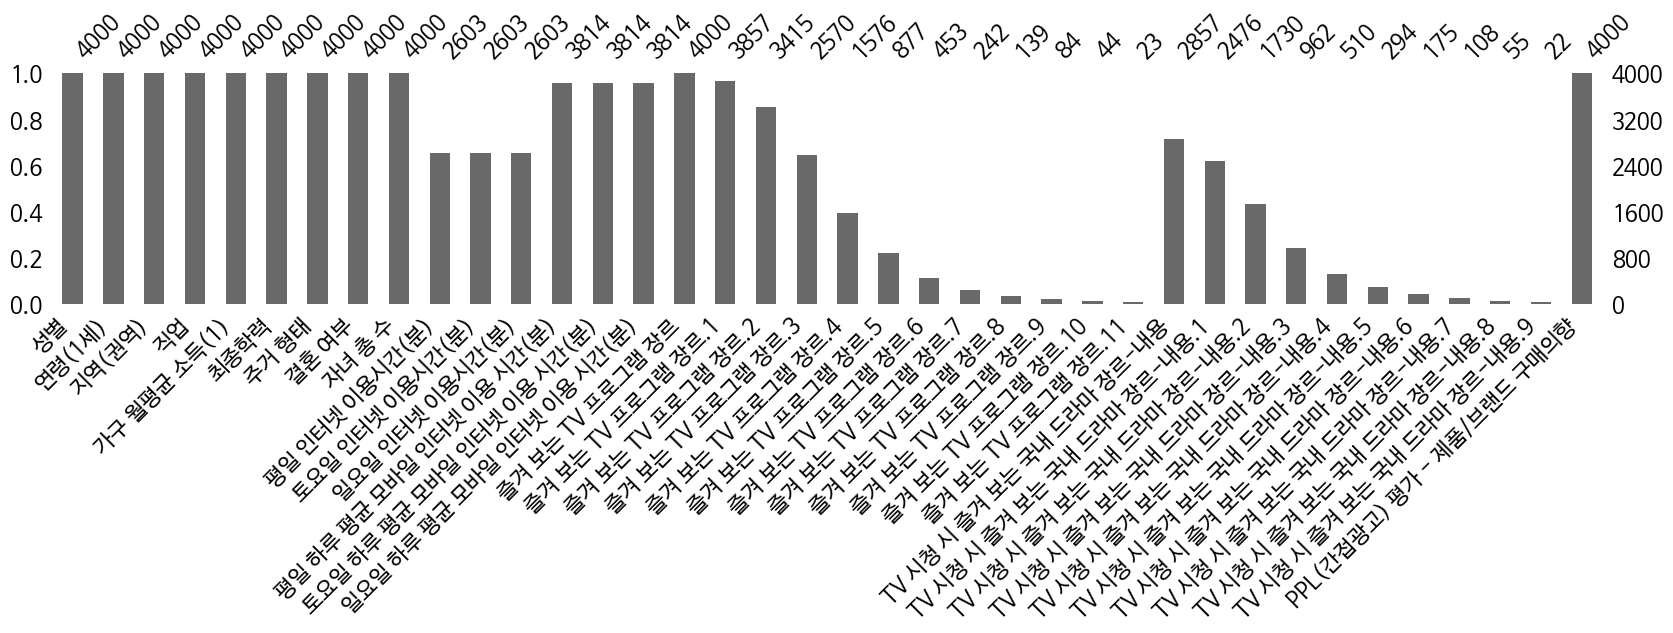

In [6]:
import missingno as msno # !pip install missingno
msno.bar(df, figsize=(20,3)) # msno.matrix(df, figsize=(20,3))

In [9]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [8]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
성별,int64,4000,0,2
연령(1세),int64,4000,0,57
지역(권역),int64,4000,0,7
직업,int64,4000,0,7
가구 월평균 소득(1),int64,4000,0,12
최종학력,int64,4000,0,12
주거 형태,int64,4000,0,5
결혼 여부,int64,4000,0,3
자녀 총 수,int64,4000,0,4
평일 인터넷 이용시간(분),float64,2603,1397,37


<Axes: >

Text(0.5, 1.0, '결측치 비율')

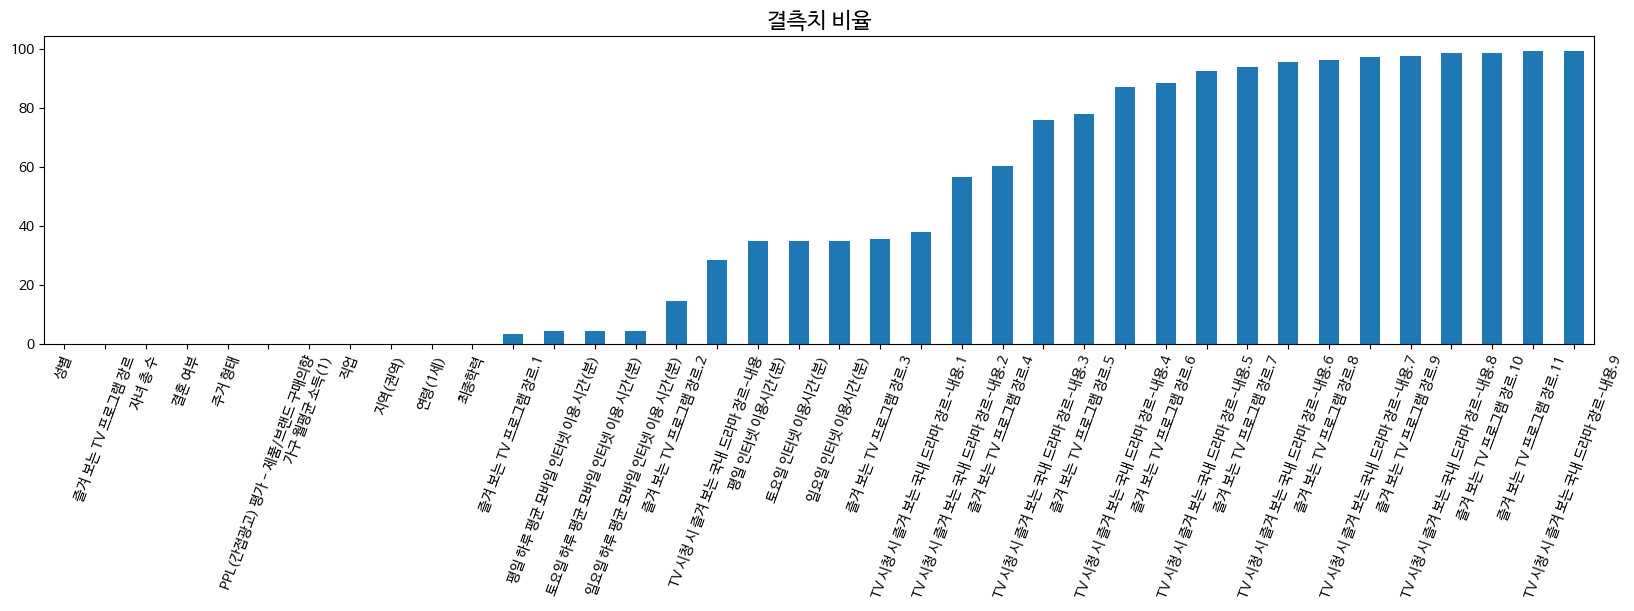

In [15]:
null_percent = df.isnull().mean()*100
null_percent.sort_values().plot.bar(figsize=(20,4), rot=70)
plt.title('결측치 비율', fontsize=16)

In [17]:
# 60퍼센트가 넘는 결측치를 가진 변수(컬럼)
print('결측치 처리 전 df shape : ', df.shape)
null_filtered = null_percent[null_percent > 60].index
null_filtered

결측치 처리 전 df shape :  (4000, 38)


Index(['즐겨 보는 TV 프로그램 장르.4', '즐겨 보는 TV 프로그램 장르.5', '즐겨 보는 TV 프로그램 장르.6',
       '즐겨 보는 TV 프로그램 장르.7', '즐겨 보는 TV 프로그램 장르.8', '즐겨 보는 TV 프로그램 장르.9',
       '즐겨 보는 TV 프로그램 장르.10', '즐겨 보는 TV 프로그램 장르.11',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.3', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.4',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.5', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.6',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.7', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.8',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.9'],
      dtype='object')

In [18]:
df = df.drop(null_filtered, axis =1) # df.drop(missing_col, axis =1, inplace=True)
print('결측치 처리 후 df shape : ', df.shape)

결측치 처리 후 df shape :  (4000, 23)


In [19]:
df.columns

Index(['성별', '연령(1세)', '지역(권역)', '직업', '가구 월평균 소득(1)', '최종학력', '주거 형태',
       '결혼 여부', '자녀 총 수', '평일 인터넷 이용시간(분)', '토요일 인터넷 이용시간(분)',
       '일요일 인터넷 이용시간(분)', '평일 하루 평균 모바일 인터넷 이용 시간(분)',
       '토요일 하루 평균 모바일 인터넷 이용 시간(분)', '일요일 하루 평균 모바일 인터넷 이용 시간(분)',
       '즐겨 보는 TV 프로그램 장르', '즐겨 보는 TV 프로그램 장르.1', '즐겨 보는 TV 프로그램 장르.2',
       '즐겨 보는 TV 프로그램 장르.3', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.1', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.2',
       'PPL(간접광고) 평가 - 제품/브랜드 구매의향'],
      dtype='object')

In [21]:
df.columns

Index(['성별', '연령(1세)', '지역(권역)', '직업', '가구 월평균 소득(1)', '최종학력', '주거 형태',
       '결혼 여부', '자녀 총 수', '평일 인터넷 이용시간(분)', '토요일 인터넷 이용시간(분)',
       '일요일 인터넷 이용시간(분)', '평일 하루 평균 모바일 인터넷 이용 시간(분)',
       '토요일 하루 평균 모바일 인터넷 이용 시간(분)', '일요일 하루 평균 모바일 인터넷 이용 시간(분)',
       '즐겨 보는 TV 프로그램 장르', '즐겨 보는 TV 프로그램 장르.1', '즐겨 보는 TV 프로그램 장르.2',
       '즐겨 보는 TV 프로그램 장르.3', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.1', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.2',
       'PPL(간접광고) 평가 - 제품/브랜드 구매의향'],
      dtype='object')

In [22]:
col_name = ['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수',
            '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일',
            'TV1', 'TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3', '구매의향']

df.columns = col_name

In [23]:
df.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
0,1,14,1,6,6,8,3,2,99,0.0,...,150.0,180.0,4,7.0,9.0,11.0,6.0,9.0,10.0,4
1,1,14,1,6,6,8,1,2,99,30.0,...,40.0,40.0,3,4.0,7.0,NaN,4.0,6.0,11.0,2
2,1,14,1,6,6,8,2,2,99,90.0,...,180.0,180.0,4,6.0,7.0,9.0,1.0,4.0,12.0,5
3,1,14,1,6,8,8,1,2,99,NaN,...,60.0,60.0,6,7.0,9.0,10.0,NaN,NaN,NaN,2
4,1,14,1,6,9,8,1,2,99,0.0,...,180.0,180.0,4,7.0,9.0,NaN,4.0,5.0,10.0,3


<Axes: >

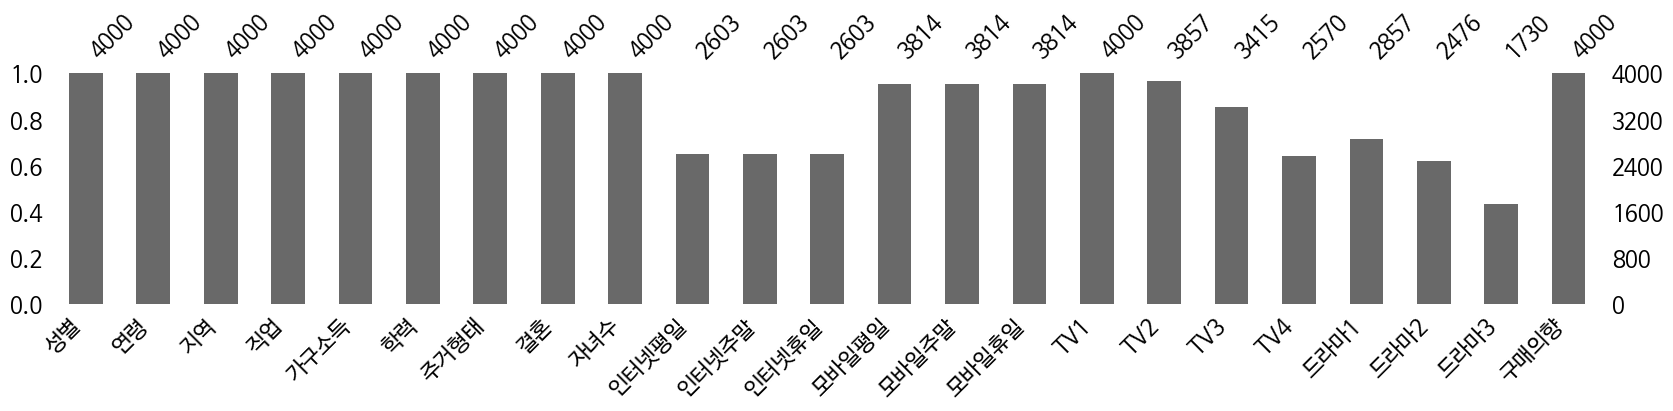

In [24]:
msno.bar(df, figsize=(20,3)) # msno.matrix(df, figsize=(20,3))

## <font color='blue'>**4.2 결측치 채우기 (Imputation)**

### practice, 중앙값으로 대체하는 실습

<Axes: >

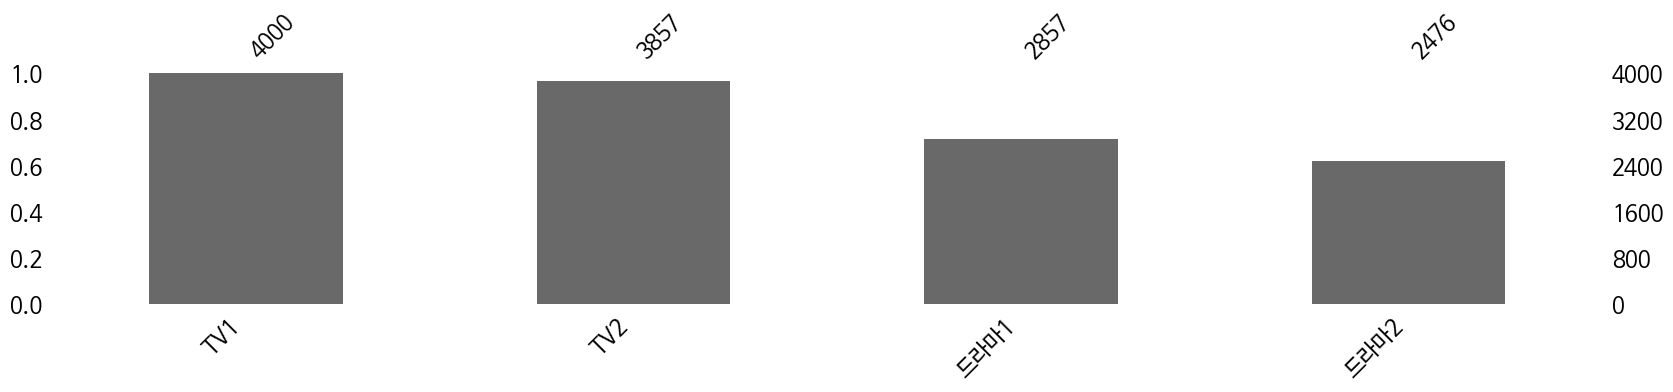

In [25]:
# 연습해 보기
tf = df[['TV1', 'TV2', '드라마1', '드라마2']]
msno.bar(tf, figsize=(20,3))

In [26]:
summary(tf)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
TV1,int64,4000,0,12
TV2,float64,3857,143,15
드라마1,float64,2857,1143,16
드라마2,float64,2476,1524,15


In [45]:
tf[tf['TV2'].isnull()]

,TV1,TV2,드라마1,드라마2
18,10,NaN,NaN,NaN
19,7,NaN,NaN,NaN
21,7,NaN,NaN,NaN
22,7,NaN,NaN,NaN
25,7,NaN,NaN,NaN
...,...,...,...,...
3698,7,NaN,NaN,NaN
3701,7,NaN,NaN,NaN
3704,7,NaN,NaN,NaN
3762,7,NaN,NaN,NaN


In [28]:
tf['TV2'].unique()

array([ 7.,  4.,  6.,  9., 10.,  3., nan, 13.,  5.,  2.,  8.,  1., 12.,
       11., 17., 16.])

In [37]:
tf['TV2'].fillna('missing').sample(20)

2568        3.0
2671        7.0
2510       10.0
2441        7.0
450         3.0
1251        9.0
662         7.0
72          6.0
1416        2.0
3575        2.0
2721        7.0
840         4.0
2323    missing
3562        2.0
811         4.0
1736    missing
1843        7.0
3274        2.0
440         4.0
1007        4.0
Name: TV2, dtype: object

In [38]:
tf['TV2'].fillna(99999).sample(20)

3346    99999.0
3477        2.0
1725        2.0
1315        3.0
2908        2.0
520         3.0
2014        9.0
2568        3.0
2918        7.0
3945        4.0
3911        4.0
1624        4.0
3330        4.0
2410        2.0
3021        4.0
3912        2.0
2062        2.0
1435        2.0
2667    99999.0
3468        3.0
Name: TV2, dtype: float64

In [ ]:
tf['TV2'].mean() # 의미가 없음, 평균이나 중앙값 tf['TV2'].median()은 의미 없음

4.228934404977962

In [46]:
tf['TV2'].mode() # 가장 자주 나타난 수자

0    2.0
Name: TV2, dtype: float64

In [51]:
tf['TV2'].fillna(tf['TV2'].mode()).sample(10)

3823    4.0
2494    3.0
3672    NaN
706     4.0
516     7.0
2848    NaN
21      NaN
1241    4.0
3175    7.0
1168    2.0
Name: TV2, dtype: float64

In [52]:
type(tf['TV2'].mode())

pandas.core.series.Series

In [55]:
tf['TV2'].mode().values

array([2.])

In [56]:
tf['TV2'].fillna(tf['TV2'].mode().values).isnull().sum()

TypeError: ignored

In [59]:
tf['TV2'].mode().values[0]

2.0

In [60]:
fill = tf['TV2'].mode().values[0]
tf['TV2'].fillna(fill).isnull().sum()

0

In [61]:
tf['TV2'].fillna(fill, inplace= True)

In [63]:
summary(tf)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
TV1,int64,4000,0,12
TV2,float64,4000,0,15
드라마1,float64,2857,1143,16
드라마2,float64,2476,1524,15


In [ ]:
tf['TV2'].fillna(fill, inplace= True)

In [64]:
for col in tf.columns:
    fill = tf[col].mode().values[0]
    tf[col].fillna(fill, inplace= True)

In [65]:
summary(tf)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
TV1,int64,4000,0,12
TV2,float64,4000,0,15
드라마1,float64,4000,0,16
드라마2,float64,4000,0,15


<Axes: >

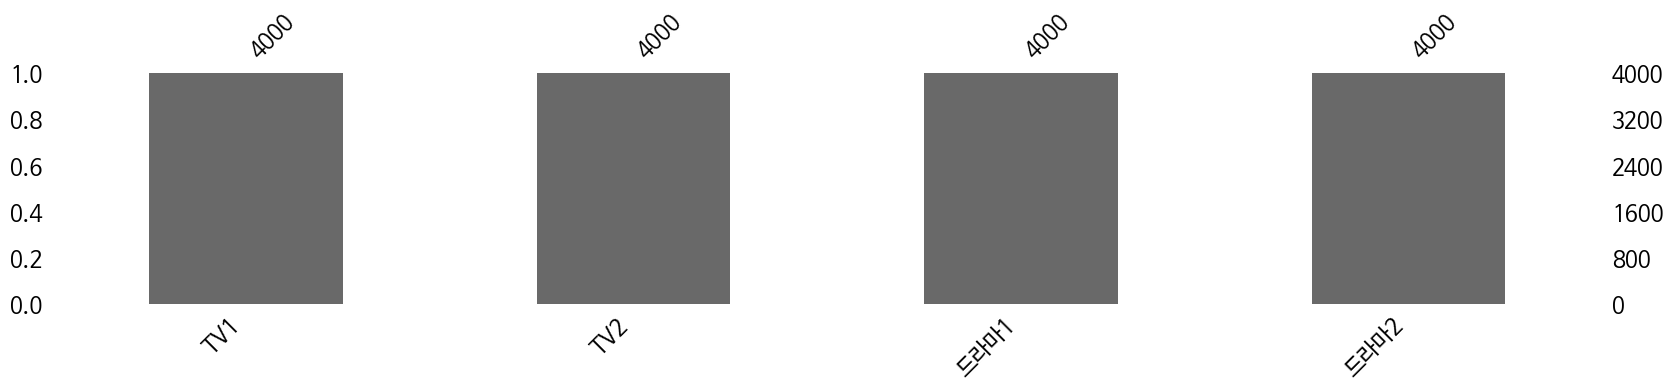

In [66]:
msno.bar(tf, figsize=(20,3))

### **중앙값으로 결측치 대체**
#### 컬럼별 변수의 자료형이 실수인지 범주형인지 판단해야 함

In [74]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [69]:
for i in df :
    df[i].unique()[0:5]

array([1, 2])

array([14, 13, 15, 18, 16])

array([1, 5, 6, 2, 4])

array([6, 7, 1, 2, 3])

array([6, 8, 9, 5, 3])

array([ 8,  9,  3, 11,  2])

array([3, 1, 2, 4, 5])

array([2, 1, 3])

array([99,  1,  2,  3])

array([  0.,  30.,  90.,  nan, 120.])

array([120.,  40.,  60.,  nan, 180.])

array([120.,  40.,  60.,  nan, 180.])

array([180.,  30., 120.,  60.,  nan])

array([150.,  40., 180.,  60., 240.])

array([180.,  40.,  60., 120., 240.])

array([4, 3, 6, 7, 1])

array([ 7.,  4.,  6.,  9., 10.])

array([ 9.,  7., nan, 13., 12.])

array([11., nan,  9., 10., 13.])

array([ 6.,  4.,  1., nan,  8.])

array([ 9.,  6.,  4., nan,  5.])

array([10., 11., 12., nan,  8.])

array([4, 2, 5, 3, 1])

In [71]:
[df[i].unique()[0:5] for i in df]

[array([1, 2]),
 array([14, 13, 15, 18, 16]),
 array([1, 5, 6, 2, 4]),
 array([6, 7, 1, 2, 3]),
 array([6, 8, 9, 5, 3]),
 array([ 8,  9,  3, 11,  2]),
 array([3, 1, 2, 4, 5]),
 array([2, 1, 3]),
 array([99,  1,  2,  3]),
 array([  0.,  30.,  90.,  nan, 120.]),
 array([120.,  40.,  60.,  nan, 180.]),
 array([120.,  40.,  60.,  nan, 180.]),
 array([180.,  30., 120.,  60.,  nan]),
 array([150.,  40., 180.,  60., 240.]),
 array([180.,  40.,  60., 120., 240.]),
 array([4, 3, 6, 7, 1]),
 array([ 7.,  4.,  6.,  9., 10.]),
 array([ 9.,  7., nan, 13., 12.]),
 array([11., nan,  9., 10., 13.]),
 array([ 6.,  4.,  1., nan,  8.]),
 array([ 9.,  6.,  4., nan,  5.]),
 array([10., 11., 12., nan,  8.]),
 array([4, 2, 5, 3, 1])]

In [75]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique(),
                       '자료 내용': [df[i].unique()[0:5] for i in df]
                       })
    return tf

In [76]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique),자료 내용
성별,int64,4000,0,2,"[1, 2]"
연령,int64,4000,0,57,"[14, 13, 15, 18, 16]"
지역,int64,4000,0,7,"[1, 5, 6, 2, 4]"
직업,int64,4000,0,7,"[6, 7, 1, 2, 3]"
가구소득,int64,4000,0,12,"[6, 8, 9, 5, 3]"
학력,int64,4000,0,12,"[8, 9, 3, 11, 2]"
주거형태,int64,4000,0,5,"[3, 1, 2, 4, 5]"
결혼,int64,4000,0,3,"[2, 1, 3]"
자녀수,int64,4000,0,4,"[99, 1, 2, 3]"
인터넷평일,float64,2603,1397,37,"[0.0, 30.0, 90.0, nan, 120.0]"


In [77]:
# 수치형으로 간주한다
num = ['인터넷평일','인터넷주말','인터넷휴일','모바일평일','모바일주말','모바일휴일']
for col in num :
    df[col].fillna(df[col].median(), inplace=True)

In [78]:
# 선호도라 법주형이다
cat = ['TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3']
for col in cat :
    df[col].fillna(df[col].mode().values[0], inplace=True)

In [81]:
# 데이터를 체크하는 방법
print('nan, inf & -inf의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf의 개수는 ?   0


<Axes: >

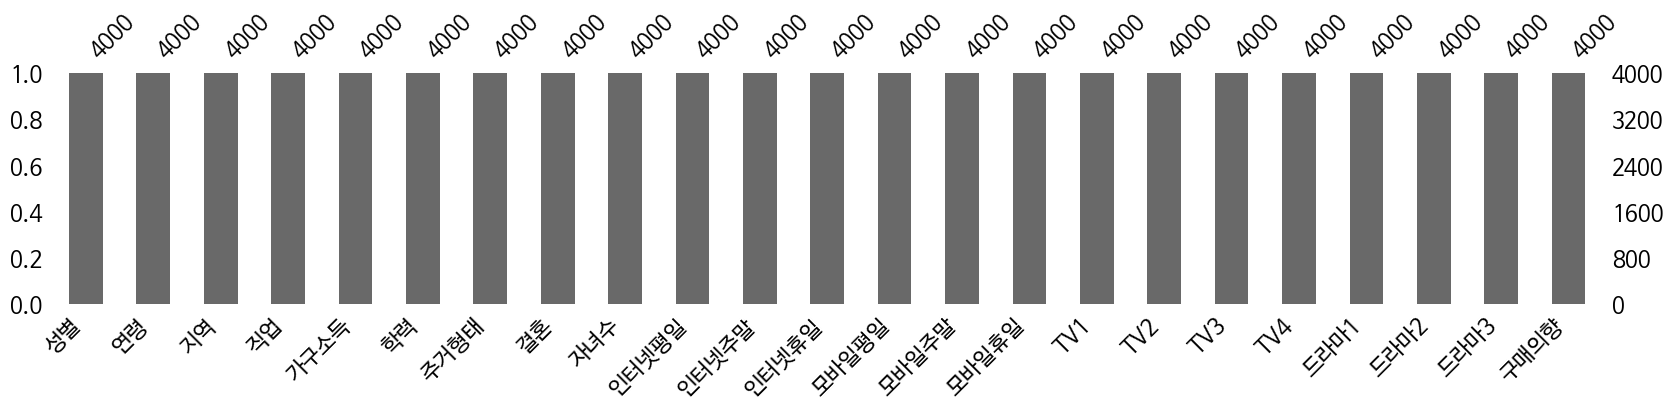

In [80]:
msno.bar(df, figsize=(20,3))

## <font color='blue'> **4.3 이상한 값 등 처리**


### <font color='blue'> **4.3.1.이상치(Outliers) 처리**

<Axes: >

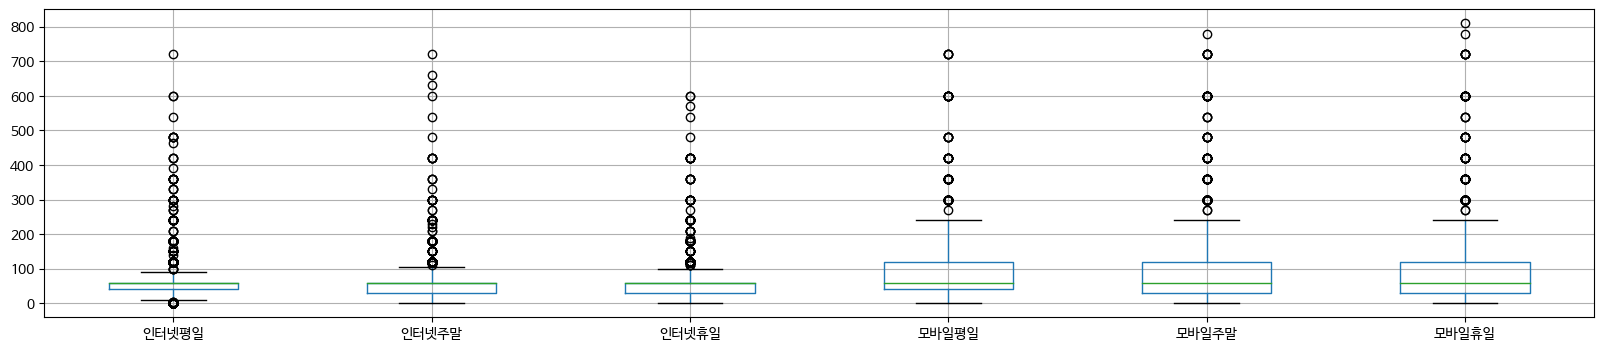

In [82]:
suspects = ['인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일']
df.boxplot(column=suspects , figsize=(20,4))

<img src='https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png'>

In [114]:
q1 = df['인터넷평일'].quantile(0.25)
q2 = df['인터넷평일'].quantile(0.5)
q3 = df['인터넷평일'].quantile(0.75)
print(q1)
print(q2)
print(q3)

40.0
60.0
60.0


In [115]:
df['인터넷평일'].median()

60.0

In [116]:
iqr = q3 - q1
iqr

20.0

In [117]:
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr

In [118]:
df['인터넷평일'].shape

(4000,)

In [119]:
outliers = df['인터넷평일'][(df['인터넷평일'] < l_fence) | (df['인터넷평일'] > u_fence)]
outliers

Series([], Name: 인터넷평일, dtype: float64)

In [107]:
outliers.shape
outliers.index

(695,)

Int64Index([   0,    4,    6,    8,    9,   14,   16,   18,   21,   23,
            ...
            3943, 3960, 3962, 3966, 3968, 3971, 3973, 3975, 3981, 3982],
           dtype='int64', length=695)

In [112]:
def Outliers(col):

    #q1, q3 =col.quantile(0.25), col.quantile(0.75)
    q1, q3 =col.quantile(0.15), col.quantile(0.95)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
    outliers = col[(col < l_fence) | (col > u_fence)]

    col[(col < l_fence)] = l_fence
    col[(col > u_fence)] = u_fence

    print(col.name,'의 총 이상치 관측 수:', outliers.count())
    print('Lower fence: ', l_fence, 'Upper fence: ', u_fence) #filtering = col.drop(outliers.index, axis = 0)

    return col

In [113]:
Outliers(df['인터넷평일'])

인터넷평일 의 총 이상치 관측 수: 0
Lower fence:  -60.0 Upper fence:  180.0


0       10.0
1       30.0
2       90.0
3       60.0
4       10.0
        ... 
3995    60.0
3996    60.0
3997    60.0
3998    60.0
3999    60.0
Name: 인터넷평일, Length: 4000, dtype: float64

In [120]:
for col in suspects :
    df[col] = Outliers(df[col])

인터넷평일 의 총 이상치 관측 수: 0
Lower fence:  -60.0 Upper fence:  180.0
인터넷주말 의 총 이상치 관측 수: 24
Lower fence:  -130.0 Upper fence:  270.0
인터넷휴일 의 총 이상치 관측 수: 20
Lower fence:  -180.0 Upper fence:  300.0
모바일평일 의 총 이상치 관측 수: 28
Lower fence:  -195.0 Upper fence:  405.0
모바일주말 의 총 이상치 관측 수: 23
Lower fence:  -285.0 Upper fence:  555.0
모바일휴일 의 총 이상치 관측 수: 25
Lower fence:  -285.0 Upper fence:  555.0


In [122]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0



### <font color='blue'> **4.3.2.자료형태를 의미에 맞게 변환**
#### 범주형과 실수형으로 의사결정

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4000 non-null   int64  
 1   연령      4000 non-null   int64  
 2   지역      4000 non-null   int64  
 3   직업      4000 non-null   int64  
 4   가구소득    4000 non-null   int64  
 5   학력      4000 non-null   int64  
 6   주거형태    4000 non-null   int64  
 7   결혼      4000 non-null   int64  
 8   자녀수     4000 non-null   int64  
 9   인터넷평일   4000 non-null   float64
 10  인터넷주말   4000 non-null   float64
 11  인터넷휴일   4000 non-null   float64
 12  모바일평일   4000 non-null   float64
 13  모바일주말   4000 non-null   float64
 14  모바일휴일   4000 non-null   float64
 15  TV1     4000 non-null   int64  
 16  TV2     4000 non-null   float64
 17  TV3     4000 non-null   float64
 18  TV4     4000 non-null   float64
 19  드라마1    4000 non-null   float64
 20  드라마2    4000 non-null   float64
 21  드라마3    4000 non-null   float64
 22  

In [125]:
Nums = ['연령', '가구소득', '학력', '자녀수', '인터넷평일', '인터넷주말', '인터넷휴일',
        '모바일평일', '모바일주말', '모바일휴일',
        '구매의향']

Cats = [item for item in df.columns if item not in Nums]

# 실수형 자료로 변환
for col in Nums :
        df[col] = df[col].astype('float64')

# 범주형 자료로 변환
for col in Cats :
        df[col] = df[col].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   성별      4000 non-null   category
 1   연령      4000 non-null   float64 
 2   지역      4000 non-null   category
 3   직업      4000 non-null   category
 4   가구소득    4000 non-null   float64 
 5   학력      4000 non-null   float64 
 6   주거형태    4000 non-null   category
 7   결혼      4000 non-null   category
 8   자녀수     4000 non-null   float64 
 9   인터넷평일   4000 non-null   float64 
 10  인터넷주말   4000 non-null   float64 
 11  인터넷휴일   4000 non-null   float64 
 12  모바일평일   4000 non-null   float64 
 13  모바일주말   4000 non-null   float64 
 14  모바일휴일   4000 non-null   float64 
 15  TV1     4000 non-null   category
 16  TV2     4000 non-null   category
 17  TV3     4000 non-null   category
 18  TV4     4000 non-null   category
 19  드라마1    4000 non-null   category
 20  드라마2    4000 non-null   category
 21  드라마3    4000 n

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   성별      4000 non-null   category
 1   연령      4000 non-null   float64 
 2   지역      4000 non-null   category
 3   직업      4000 non-null   category
 4   가구소득    4000 non-null   float64 
 5   학력      4000 non-null   float64 
 6   주거형태    4000 non-null   category
 7   결혼      4000 non-null   category
 8   자녀수     4000 non-null   float64 
 9   인터넷평일   4000 non-null   float64 
 10  인터넷주말   4000 non-null   float64 
 11  인터넷휴일   4000 non-null   float64 
 12  모바일평일   4000 non-null   float64 
 13  모바일주말   4000 non-null   float64 
 14  모바일휴일   4000 non-null   float64 
 15  TV1     4000 non-null   category
 16  TV2     4000 non-null   category
 17  TV3     4000 non-null   category
 18  TV4     4000 non-null   category
 19  드라마1    4000 non-null   category
 20  드라마2    4000 non-null   category
 21  드라마3    4000 n

### <font color='blue'> **4.3.3.실수형을 범주형으로 변환(Discretinization)**

In [132]:
# 실수형이라 여기고 범주형으로 변환
df['연령'].unique()

array([14., 13., 15., 18., 16., 17., 19., 22., 20., 23., 21., 24., 27.,
       25., 26., 28., 29., 34., 33., 32., 31., 30., 36., 38., 35., 39.,
       37., 40., 41., 42., 44., 43., 48., 46., 49., 45., 47., 51., 54.,
       53., 52., 50., 56., 58., 55., 59., 57., 63., 61., 62., 64., 60.,
       67., 69., 66., 68., 65.])

In [134]:
pd.cut(df['연령'], bins = 5)

0       (12.944, 24.2]
1       (12.944, 24.2]
2       (12.944, 24.2]
3       (12.944, 24.2]
4       (12.944, 24.2]
             ...      
3995      (57.8, 69.0]
3996      (57.8, 69.0]
3997      (57.8, 69.0]
3998      (57.8, 69.0]
3999      (57.8, 69.0]
Name: 연령, Length: 4000, dtype: category
Categories (5, interval[float64, right]): [(12.944, 24.2] < (24.2, 35.4] < (35.4, 46.6] <
                                           (46.6, 57.8] < (57.8, 69.0]]

### <font color='blue'> **4.3.4.범주형을 실수형으로 변환(onehot code)**

In [136]:
df['결혼'].unique()

[2, 1, 3]
Categories (3, int64): [1, 2, 3]

In [139]:
pd.get_dummies(df['결혼'])

,1,2,3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
3995,0,0,1
3996,1,0,0
3997,1,0,0
3998,0,0,1


### <font color='blue'> **4.3.5.이상한 응답값 처리**

In [140]:
df.max()

연령        69.0
가구소득      99.0
학력        12.0
자녀수       99.0
인터넷평일     90.0
인터넷주말    270.0
인터넷휴일    300.0
모바일평일    405.0
모바일주말    555.0
모바일휴일    555.0
구매의향       6.0
dtype: float64

가구 소득과 자녀수가 '99'라니 무슨 소리? 오타일 것임- 무응답을 잘못 기록

In [143]:
df.loc[df['가구소득'] == 99]

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
871,2,61.0,1,5,99.0,4.0,1,1,2.0,60.0,...,30.0,30.0,1,2.0,3.0,4.0,5.0,4.0,4.0,4.0
3203,1,69.0,7,7,99.0,3.0,2,3,99.0,20.0,...,120.0,180.0,1,3.0,4.0,7.0,4.0,8.0,12.0,4.0


In [144]:
df.loc[df['가구소득'] == 99].index

Int64Index([871, 3203], dtype='int64')

In [145]:
# 행을 제거
df.drop(df.loc[df['가구소득'] == 99].index, inplace = True)

In [146]:
df.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
0,1,14.0,1,6,6.0,8.0,3,2,99.0,10.0,...,150.0,180.0,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,1,6,6.0,8.0,1,2,99.0,30.0,...,40.0,40.0,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,1,6,6.0,8.0,2,2,99.0,90.0,...,180.0,180.0,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,1,6,8.0,8.0,1,2,99.0,60.0,...,60.0,60.0,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,1,6,9.0,8.0,1,2,99.0,10.0,...,180.0,180.0,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0


In [147]:
# 다른 방법으로 lambda 함수
df['자녀수'] = df['자녀수'].apply(lambda x: 0 if x == 99 else x)

In [148]:
df.max()

연령        69.0
가구소득      11.0
학력        12.0
자녀수        3.0
인터넷평일     90.0
인터넷주말    270.0
인터넷휴일    300.0
모바일평일    405.0
모바일주말    555.0
모바일휴일    555.0
구매의향       6.0
dtype: float64

### <font color='blue'> **4.3.6.왜도처리(skewness) 처리**


데이터의 분포가 한쪽으로 쏠린 것을 의미하는 Skewness는 positive Skewness와 Negative Skewness로 나뉜다. Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은) 형태이고, Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태이다. 일반적으로 고려 가능한 Un-Skew 수치는 +2~-2 사이이다. (George & Mallery, 2010). George, D., & Mallery, M. (2010). 즉, Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터라고 볼 수 있다.
- 2 미만은 Negative Skew, +2 초과는 Positive Skew.

왜도 확인/
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
- https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

https://rucrazia.tistory.com/65

In [149]:
# 의심이 가는 컬럼 확인
check = ['인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일']
df[check].skew()

인터넷평일   -0.359748
인터넷주말    1.755104
인터넷휴일    1.900019
모바일평일    1.959281
모바일주말    2.337232
모바일휴일    2.225676
dtype: float64

In [150]:
df[check].skew()[(df[check].skew() > 2) | (df[check].skew() < -2)]

모바일주말    2.337232
모바일휴일    2.225676
dtype: float64

array([[<Axes: title={'center': '모바일주말'}>,
        <Axes: title={'center': '모바일휴일'}>]], dtype=object)

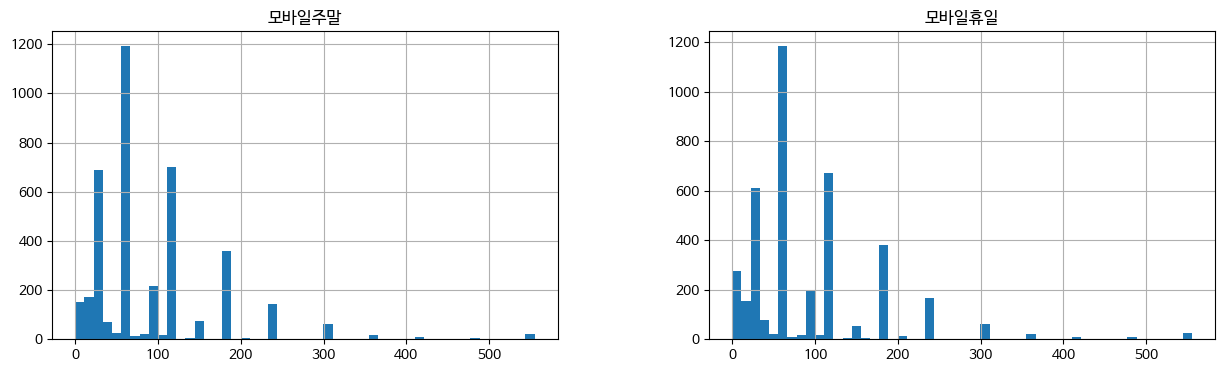

In [151]:
sk = ['모바일주말', '모바일휴일']
df[sk].hist(bins=50, figsize=(15,4))

<Axes: xlabel='모바일주말', ylabel='Density'>

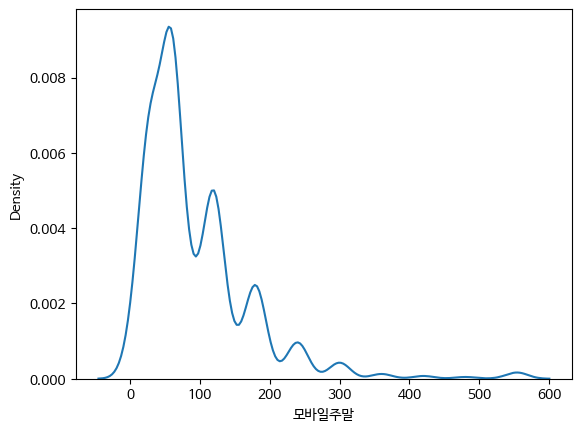

In [153]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
import seaborn as sns
sns.kdeplot(data=df, x=sk[0])

<Axes: xlabel='모바일휴일', ylabel='Density'>

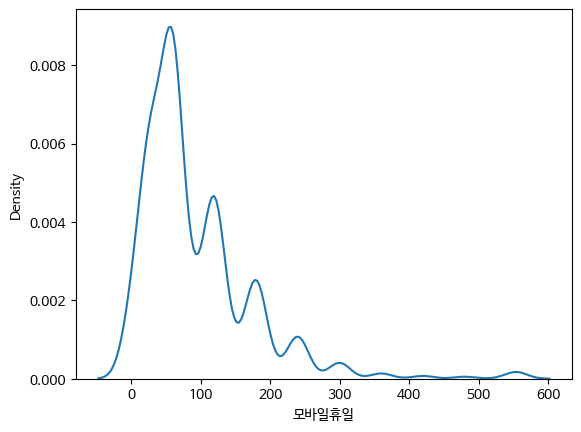

In [154]:
sns.kdeplot(data=df, x=sk[1])

 변환방안 : Log Transform과 square root 변환 비교 확인

In [155]:
for i in sk :
    print('변수명 :', i)
    print('원자료_skewness :', df[i].skew())
    print('log변환_skewness :', np.log(1 + df[i]).skew()) # -inf방지
    print('squareroot변환_skewness :', np.sqrt(df[i]).skew())
    print('*'*50)

변수명 : 모바일주말
원자료_skewness : 2.337232048224837
log변환_skewness : -0.9497356873099924
squareroot변환_skewness : 0.833814134907813
**************************************************
변수명 : 모바일휴일
원자료_skewness : 2.225676174541795
log변환_skewness : -1.6828374317932118
squareroot변환_skewness : 0.5193944017378685
**************************************************


Square root 변환으로 하는 것이 좋음

In [156]:
for i in sk :
    df[i] = np.sqrt(df[i])

In [157]:
df[sk].skew()

모바일주말    0.833814
모바일휴일    0.519394
dtype: float64

array([[<Axes: title={'center': '모바일주말'}>,
        <Axes: title={'center': '모바일휴일'}>]], dtype=object)

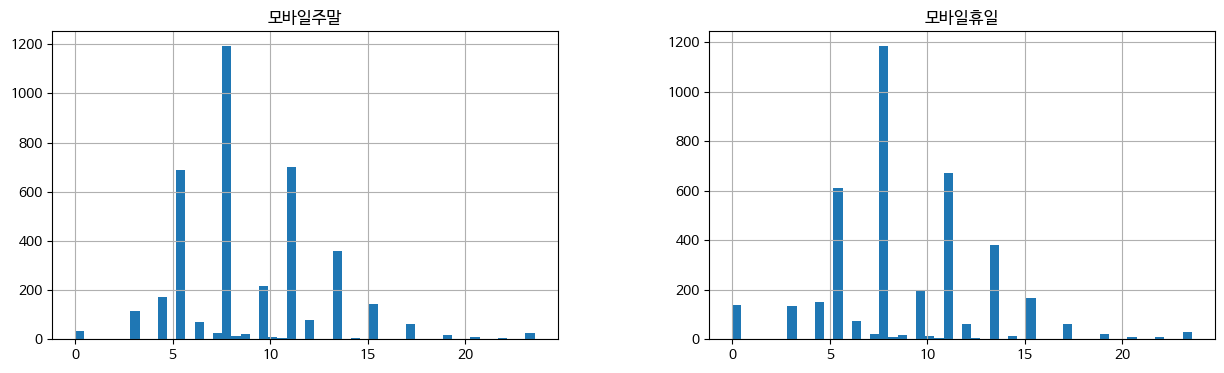

In [158]:
df[sk].hist(bins=50, figsize=(15,4))

<Axes: xlabel='모바일휴일', ylabel='Density'>

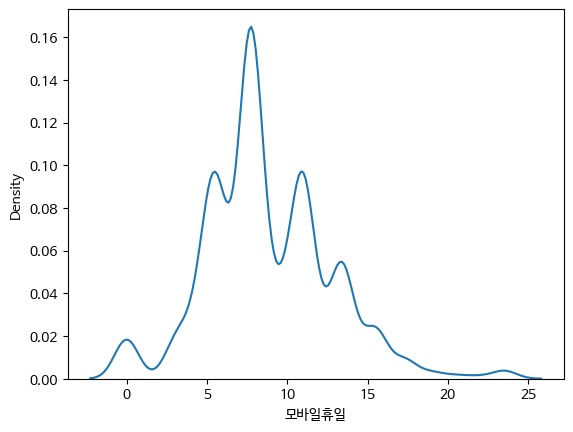

In [159]:
sns.kdeplot(data=df, x=sk[1])

In [160]:
print('The numbers of nan, inf & -inf : ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

The numbers of nan, inf & -inf :  0


### <font color='blue'> **4.3.7. 데이터 inde 정리하고 저장하기**

In [161]:
df

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
0,1,14.0,1,6,6.0,8.0,3,2,0.0,10.0,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,1,6,6.0,8.0,1,2,0.0,30.0,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,1,6,6.0,8.0,2,2,0.0,90.0,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,1,6,8.0,8.0,1,2,0.0,60.0,...,7.745967,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,1,6,9.0,8.0,1,2,0.0,10.0,...,13.416408,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2,58.0,4,4,1.0,3.0,1,3,2.0,60.0,...,7.745967,7.745967,1,2.0,3.0,4.0,1.0,4.0,8.0,4.0
3996,2,63.0,4,5,7.0,4.0,1,1,2.0,60.0,...,5.477226,5.477226,4,7.0,7.0,7.0,1.0,4.0,4.0,4.0
3997,2,61.0,4,4,4.0,3.0,2,1,1.0,60.0,...,5.477226,5.477226,1,4.0,6.0,7.0,1.0,4.0,5.0,4.0
3998,2,67.0,4,4,2.0,3.0,1,3,2.0,60.0,...,5.477226,5.477226,1,4.0,7.0,7.0,1.0,4.0,4.0,4.0


데이터의 크기는 3998인데 index가 3999까지 있음, 즉 인덱스가 중간에서 2개가 빠져 있음 -- 반드시 정리하고 가야

In [162]:
df.reset_index(drop = True)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
0,1,14.0,1,6,6.0,8.0,3,2,0.0,10.0,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,1,6,6.0,8.0,1,2,0.0,30.0,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,1,6,6.0,8.0,2,2,0.0,90.0,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,1,6,8.0,8.0,1,2,0.0,60.0,...,7.745967,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,1,6,9.0,8.0,1,2,0.0,10.0,...,13.416408,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,2,58.0,4,4,1.0,3.0,1,3,2.0,60.0,...,7.745967,7.745967,1,2.0,3.0,4.0,1.0,4.0,8.0,4.0
3994,2,63.0,4,5,7.0,4.0,1,1,2.0,60.0,...,5.477226,5.477226,4,7.0,7.0,7.0,1.0,4.0,4.0,4.0
3995,2,61.0,4,4,4.0,3.0,2,1,1.0,60.0,...,5.477226,5.477226,1,4.0,6.0,7.0,1.0,4.0,5.0,4.0
3996,2,67.0,4,4,2.0,3.0,1,3,2.0,60.0,...,5.477226,5.477226,1,4.0,7.0,7.0,1.0,4.0,4.0,4.0


In [163]:
df.reset_index(drop = True, inplace= True) # df.index = [i for i in range(len(df))]

In [164]:
df

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매의향
0,1,14.0,1,6,6.0,8.0,3,2,0.0,10.0,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,1,6,6.0,8.0,1,2,0.0,30.0,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,1,6,6.0,8.0,2,2,0.0,90.0,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,1,6,8.0,8.0,1,2,0.0,60.0,...,7.745967,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,1,6,9.0,8.0,1,2,0.0,10.0,...,13.416408,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,2,58.0,4,4,1.0,3.0,1,3,2.0,60.0,...,7.745967,7.745967,1,2.0,3.0,4.0,1.0,4.0,8.0,4.0
3994,2,63.0,4,5,7.0,4.0,1,1,2.0,60.0,...,5.477226,5.477226,4,7.0,7.0,7.0,1.0,4.0,4.0,4.0
3995,2,61.0,4,4,4.0,3.0,2,1,1.0,60.0,...,5.477226,5.477226,1,4.0,6.0,7.0,1.0,4.0,5.0,4.0
3996,2,67.0,4,4,2.0,3.0,1,3,2.0,60.0,...,5.477226,5.477226,1,4.0,7.0,7.0,1.0,4.0,4.0,4.0


In [165]:
# 다음 작업을 위해 중간 저장하기
df.to_pickle('4장.pkl')